In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

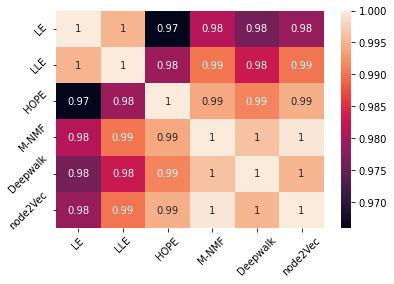

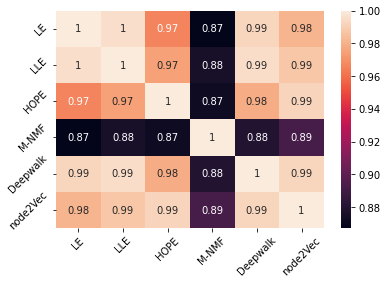

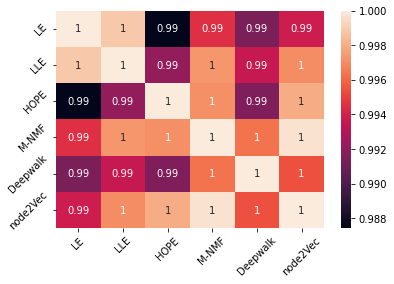

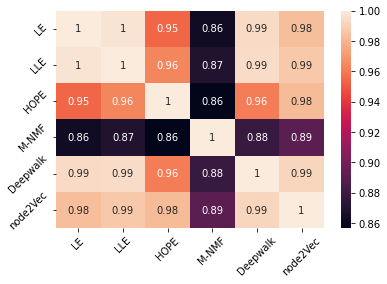

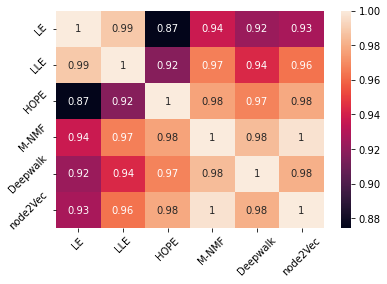

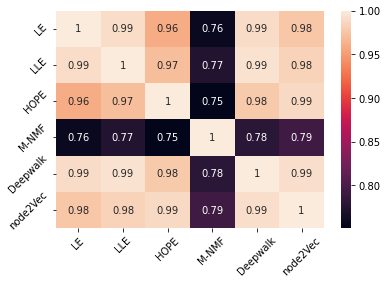

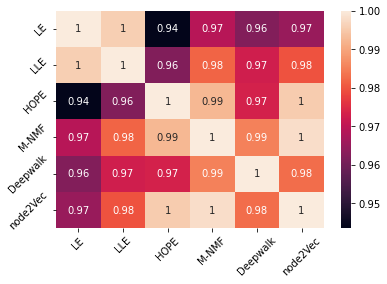

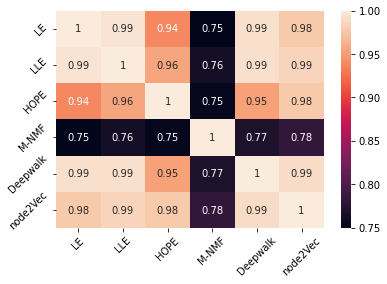

In [3]:
for method in [0,1,2,3]:
    algo_performance = {}
    algo_performance_array = {}
    algo_comparison = {}
    g = {}
    for mu in [0.01, 0.5]:
        algo_performance[mu] = []
        for algo in [2, 3, 1, 5, 4, 7]:
            filename = f"HeatMap_{mu}/{algo}_{method}.mean"
            ecs_array = np.loadtxt(filename, delimiter=' ')
            ecs_array = ecs_array.reshape([1, ecs_array.shape[0]*ecs_array.shape[1]])
            algo_performance[mu].append(ecs_array)
        algo_performance_array[mu] = np.asarray(algo_performance[mu]).squeeze()
        algo_comparison[mu] = cosine_similarity(algo_performance_array[mu])
        g[mu] = sb.heatmap(algo_comparison[mu], annot=True)
        g[mu].set_yticklabels(['LE','LLE','HOPE','M-NMF','Deepwalk','node2Vec'], rotation=45)
        g[mu].set_xticklabels(['LE','LLE','HOPE','M-NMF','Deepwalk','node2Vec'], rotation=45)
        plt.show()

Eucliean NMI


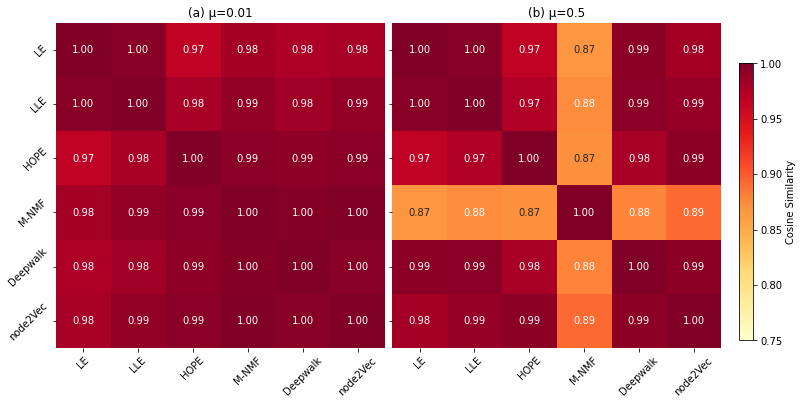

Spherical NMI


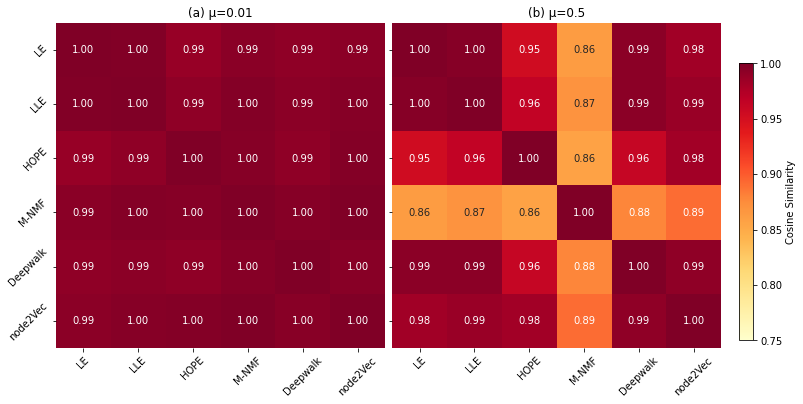

Euclidean ECS


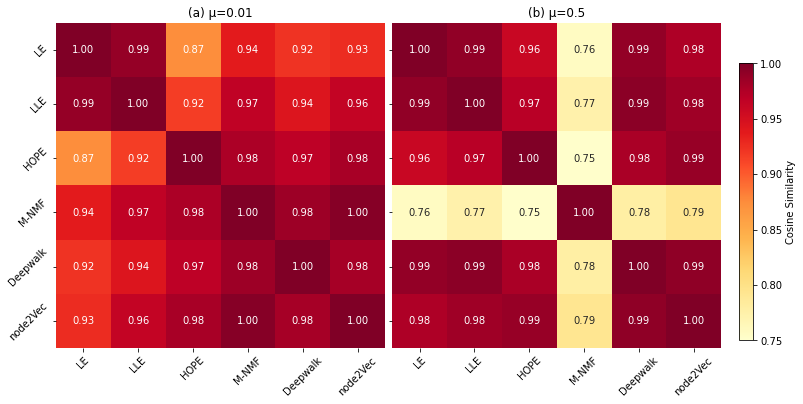

Spherical ECS


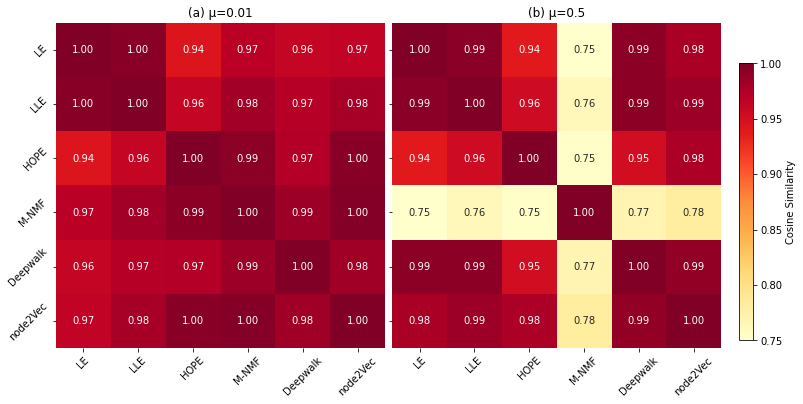

In [4]:
vmin = 0.75
vmax = 1
ind = {0.01:0, 0.5:1}
let = {0.01: 'a', 0.5:'b'}
Label = ["Eucliean NMI", "Spherical NMI", "Euclidean ECS", "Spherical ECS"]

for method in [0,1,2,3]:
    algo_comparison = {}
    heatmap = {}
    # Create subplots with a shared y-axis and x-axis
    fig, axs = plt.subplots(1, 2, figsize=(10, 5.5), sharey=True, sharex=True, constrained_layout=True)  # 1 row, 2 columns, share y-axis
    for mu in [0.01, 0.5]:
        algo_performance = []
        for algo in [2, 3, 1, 5, 4, 7]:
            filename = f"HeatMap_{mu}/{algo}_{method}.mean"
            ecs_array = np.loadtxt(filename, delimiter=' ')
            ecs_array = ecs_array.reshape([1, ecs_array.shape[0]*ecs_array.shape[1]])
            algo_performance.append(ecs_array)
        algo_performance_array = np.asarray(algo_performance).squeeze()
        algo_comparison[mu] = cosine_similarity(algo_performance_array)
        # Plot the first heatmap in the first subplot using Seaborn
        heatmap[mu] = sb.heatmap(algo_comparison[mu], cmap="YlOrRd" , ax=axs[ind[mu]], 
                                 annot=True, fmt=".2f", cbar=False, vmin=vmin, vmax=vmax)
        heatmap[mu].set_yticklabels(['LE','LLE','HOPE','M-NMF','Deepwalk','node2Vec'], rotation=45)
        heatmap[mu].set_xticklabels(['LE','LLE','HOPE','M-NMF','Deepwalk','node2Vec'], rotation=45)
        axs[ind[mu]].set_title(f'({let[mu]}) μ={mu}')
    axs[0].set_xlabel('')  # Remove x-axis label
    axs[1].set_xlabel('')  # Remove x-axis label
    axs[1].set_ylabel('')
    # Create a common color bar for both heatmaps
    cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(heatmap[0.5].collections[0], cax=cbar_ax)

    # Set color bar label
    cbar.set_label('Cosine Similarity')

    plt.savefig(Label[method]+"方法比较热力图",bbox_inches='tight')
    print(Label[method])
    # Show the plot
    plt.show()